project CONVOLUTIONAL NEURAL NETWORK ON MULTIPLE DATASET BY MAUZUM SHAMIL

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization,MaxPooling2D,Dropout
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical,plot_model
import os

# encoding and importing the folder

In [2]:
encoder = LabelEncoder()
encoder.fit(["cloudy","rainy","shine"])

LabelEncoder()

In [3]:
data = []
label = []
paths = []

for weather_folder in ["cloudy","rainy","shine"]:
    class_index = encoder.transform([weather_folder])[0]
    class_label = to_categorical(class_index,num_classes=3)

for r,d,f in os.walk(r"C:\Users\dell\Desktop\weather dataset"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if img.shape==(128,128,3):
        data.append(img)
        label.append(class_label)

data = np.array(data)
label = np.array(label)

print(data.shape)
print(label.shape)


(763, 128, 128, 3)
(763, 3)


In [4]:
labels = np.array(label)
labels = label.reshape((763,-1))

In [5]:
labels.shape

(763, 3)

# visualization

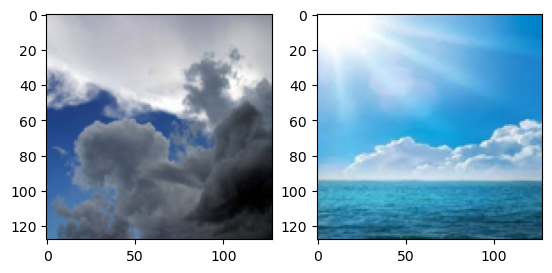

In [6]:
plt.subplot(1,2,1)
plt.imshow(data[100])
plt.subplot(1,2,2)
plt.imshow(data[700])

# splitting

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,shuffle=True,random_state=0)

# MODEL CREATION

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,115 (128.12 MB)

 Trainable params: 33,585,923 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


# model compilation

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
x_train.shape

(610, 128, 128, 3)

In [11]:
x_test.shape

(153, 128, 128, 3)

In [12]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8403 - loss: 0.3620
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 6.8597e-13
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9997 - loss: 0.0152  
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [13]:
score = model.evaluate(x_test,y_test,batch_size=64)
print(" the test accuracy: %.1f%%"%(100 * score[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.8239 - loss: 3.8636
 the test accuracy: 82.4%


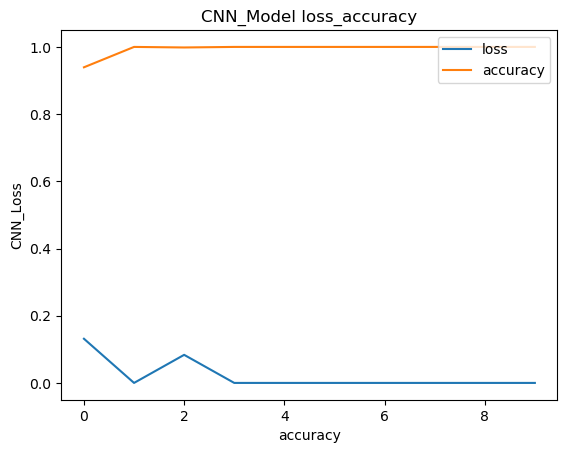

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN_Model loss_accuracy')
plt.ylabel('CNN_Loss')
plt.xlabel('accuracy')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [45]:
def names(number):
    if number==0:
        return 'weather is cloudy'
    elif number==1:
        return 'weather is rainy'
    elif number==2:
        return 'weather is shine'
    else:
        return 'photo cant be detected'
    

2
weather is shining


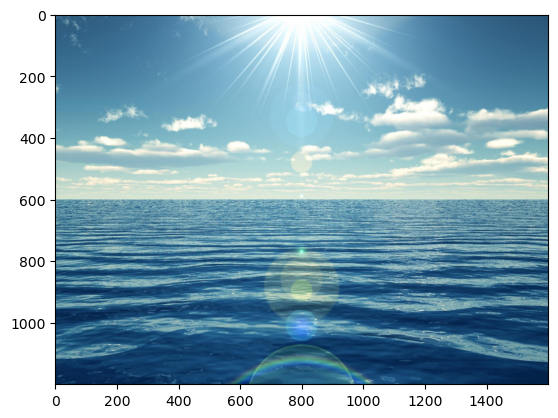

In [23]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\shine\shine9.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(names(classification))

weather is rainy


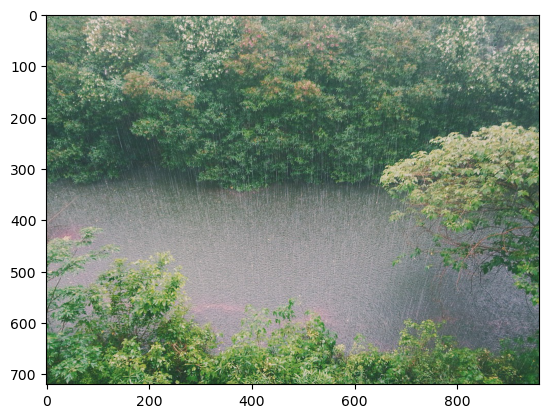

In [40]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\rainy\rain211.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

weather is cloudy


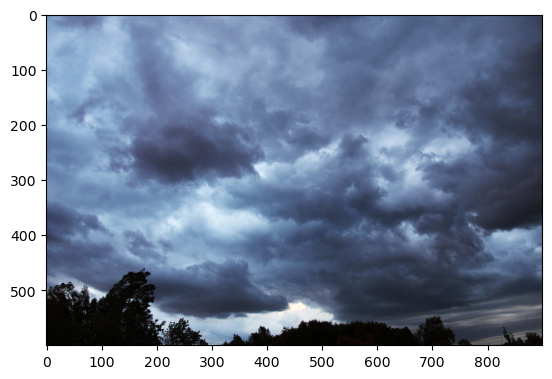

In [44]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\cloudy\cloudy148.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))